In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clustering with Unsupervised Learning

See google drive for short answer questions. 

## Hands on

### 10a

Load the Olivetti faces dataset from sklearn datasets. Then use stratified sampling to split the dataset into train, test, and validate sets.  

In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

# retrieve faces. 
faces = fetch_olivetti_faces()
# print(faces.DESCR)
# print(type(faces.target))

# split test from train_valid
strat = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat.split(faces.data, faces.target))
X_train_vaild = faces.data[train_valid_idx] 
y_train_valid = faces.target[train_valid_idx]
X_test = faces.data[test_idx]
y_test = faces.target[test_idx]

# split train from valid
strat = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat.split(X_train_vaild, y_train_valid))
X_train = X_train_vaild[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_vaild[valid_idx]
y_valid = y_train_valid[valid_idx]

# look at shapes of data
print(faces.data.shape, faces.target.shape)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(400, 4096) (400,)
(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


### 10b 

Reduce dimensionality with PCA and cluster the faces with k-means. Then use inertia and silhouette scores to identify a optimal clusters. 

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# decompose to 99% of variance
pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

# check components preserved
print(pca.n_components_)

# compute kmeans models for a range of clusters
k_range = range(5,150,5)
kmeans_k = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_k.append(kmeans)

199


### 10c

Use inertia and silhouette scores to identify a optimal clusters. Do the optimal clusters make sense?

Based on silhouette scores, roughly k=100 appears to be the optimal cluster number. Additionally, there is no clear elbow on the interia diagram. 

Considering that there are only 40 unique faces, this cluster number does not make sense at first. However, it is possible that each image will be slightly different. Images can be shifted, rotated, darker, or lighter. Persons in the photos could have variable appearances and facial expressions. As a result it is possible to have a higher number of clusters to capture this texture in the data.

19
100
0.22310655
3565.797119140625
KMeans(n_clusters=100, random_state=42)


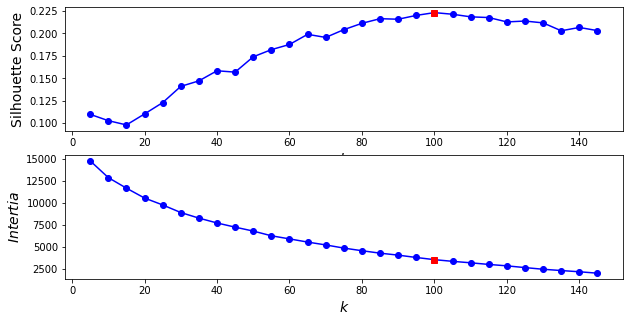

In [4]:
from sklearn.metrics import silhouette_score

# compute silhouette score for range of kmeans models
scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_k]
best_idx = np.argmax(scores)
best_k = k_range[best_idx]
best_score = scores[best_idx]
best_model = kmeans_k[best_idx]

# grab inertia attribute from each kmeans model
inertias = [model.inertia_ for model in kmeans_k]
best_inertia = inertias[best_idx]

# check scores
print(best_idx)
print(best_k)
print(best_score)
print(best_inertia)
print(best_model)

# plot it
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,5))

ax1.plot(k_range, scores, "bo-")
ax1.set_xlabel("$k$", fontsize=14)
ax1.set_ylabel("Silhouette Score", fontsize=14)
ax1.plot(best_k, best_score, "rs")

ax2.plot(k_range, inertias, "bo-")
ax2.set_xlabel("$k$", fontsize=14)
ax2.set_ylabel("$Intertia$", fontsize=14)
ax2.plot(best_k, best_inertia, "rs")

plt.show()

### 10d

Visualize the clusters. Do any of the clusters contain common faces? 

The clusters contain common faces. However, you also see mixed images within clusters. Regardless, similiarities are observed within the clusters. 

Ultimately, this form of clustering may not be useful for direct identification. There are many clusters with only single images or intruders. These cases are not useful. Rather, this method can still be used to label unknown instances in order to augment a dataset for supervised modeling.

Cluster: 0


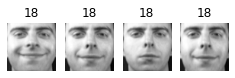

Cluster: 1


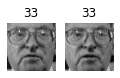

Cluster: 2


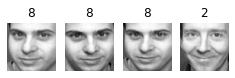

Cluster: 3


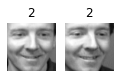

Cluster: 4


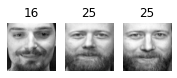

Cluster: 5


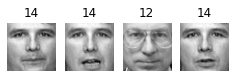

Cluster: 6


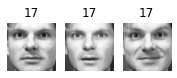

Cluster: 7


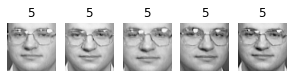

Cluster: 8


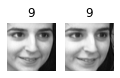

Cluster: 9


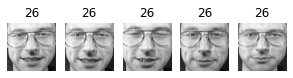

Cluster: 10


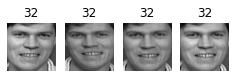

Cluster: 11


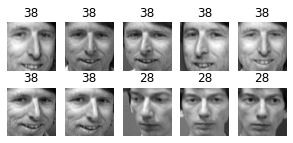

Cluster: 12


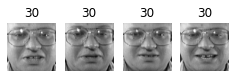

Cluster: 13


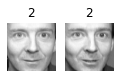

Cluster: 14


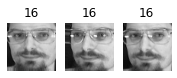

Cluster: 15


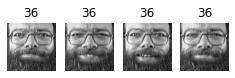

Cluster: 16


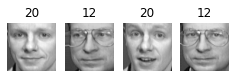

Cluster: 17


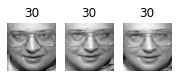

Cluster: 18


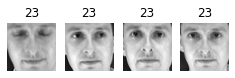

Cluster: 19


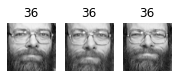

Cluster: 20


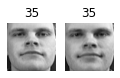

Cluster: 21


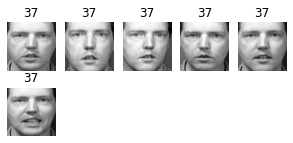

Cluster: 22


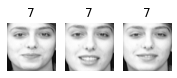

Cluster: 23


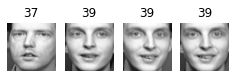

Cluster: 24


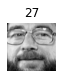

Cluster: 25


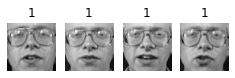

Cluster: 26


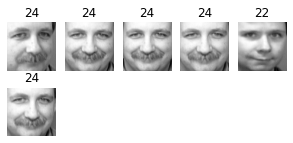

Cluster: 27


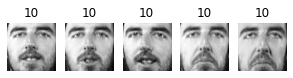

Cluster: 28


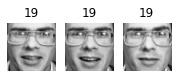

Cluster: 29


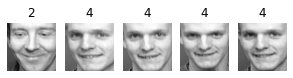

Cluster: 30


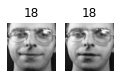

Cluster: 31


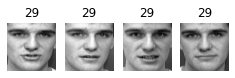

Cluster: 32


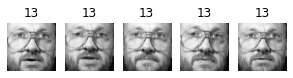

Cluster: 33


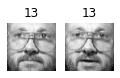

Cluster: 34


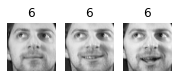

Cluster: 35


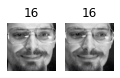

Cluster: 36


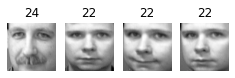

Cluster: 37


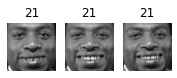

Cluster: 38


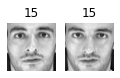

Cluster: 39


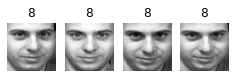

Cluster: 40


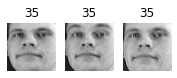

Cluster: 41


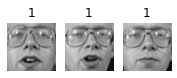

Cluster: 42


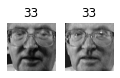

Cluster: 43


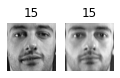

Cluster: 44


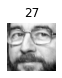

Cluster: 45


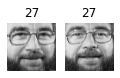

Cluster: 46


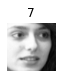

Cluster: 47


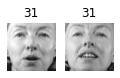

Cluster: 48


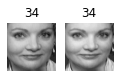

Cluster: 49


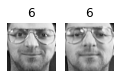

Cluster: 50


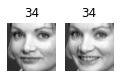

Cluster: 51


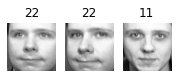

Cluster: 52


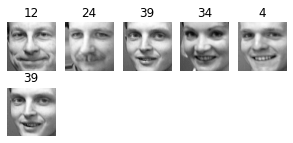

Cluster: 53


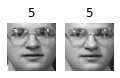

Cluster: 54


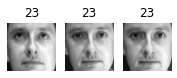

Cluster: 55


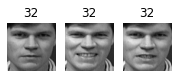

Cluster: 56


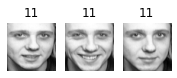

Cluster: 57


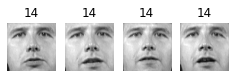

Cluster: 58


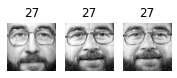

Cluster: 59


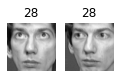

Cluster: 60


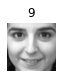

Cluster: 61


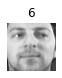

Cluster: 62


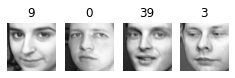

Cluster: 63


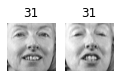

Cluster: 64


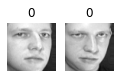

Cluster: 65


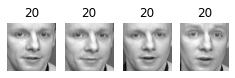

Cluster: 66


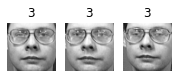

Cluster: 67


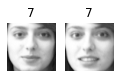

Cluster: 68


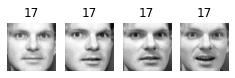

Cluster: 69


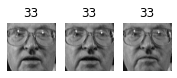

Cluster: 70


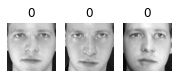

Cluster: 71


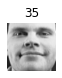

Cluster: 72


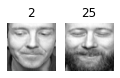

Cluster: 73


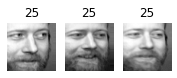

Cluster: 74


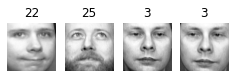

Cluster: 75


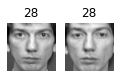

Cluster: 76


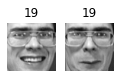

Cluster: 77


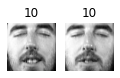

Cluster: 78


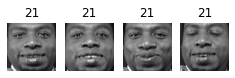

Cluster: 79


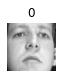

Cluster: 80


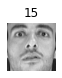

Cluster: 81


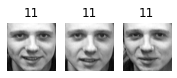

Cluster: 82


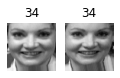

Cluster: 83


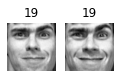

Cluster: 84


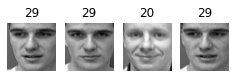

Cluster: 85


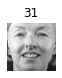

Cluster: 86


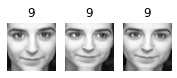

Cluster: 87


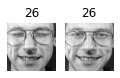

Cluster: 88


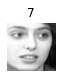

Cluster: 89


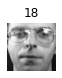

Cluster: 90


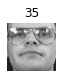

Cluster: 91


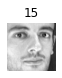

Cluster: 92


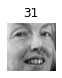

Cluster: 93


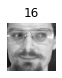

Cluster: 94


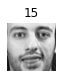

Cluster: 95


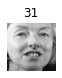

Cluster: 96


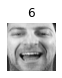

Cluster: 97


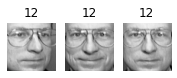

Cluster: 98


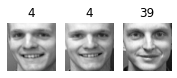

Cluster: 99


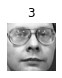

In [5]:
# make plotting function
def plot_faces(faces, labels, n_cols=5):
    # find number of rows with floor division
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    # smash index, face, and label together in a plot
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

# for unique labels (40)
for cluster_id in np.unique(best_model.labels_):
    # post cluster ID
    print(f"Cluster: {cluster_id}")
    # for each cluster find the images that belong to it
    in_cluster = best_model.labels_ == cluster_id
    # retrieve the images for each cluster from the training data
    faces = X_train[in_cluster].reshape(-1,64,64)
    # retrieve the labels for each cluster from the training data
    labels = y_train[in_cluster]
    # plot it
    plot_faces(faces, labels)

2


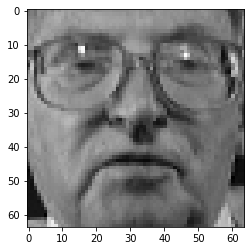

In [6]:
# scratch work
in_cluster = best_model.labels_ == 1
print(in_cluster.sum())
face = X_train[in_cluster][0].reshape(-1,64,64)
plt.imshow(face.reshape(64,64), cmap="gray")

## 12a

Run a GMM on the faces data reduced with PCA. Then generate new faces with the sample() method and visualize. Remember to use inverse_transform() to reconstruct the PCA. 


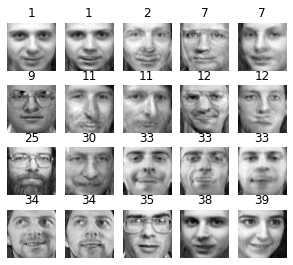

In [14]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

n_gen_faces = 20
X_gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(X_gen_faces_reduced)

plot_faces(gen_faces, y_gen_faces)

## 12b

Modify some images and see if the model can detect the anomalies. Flip, rotate, and darken images. Then compare the output of the `score_samples()` method for normal images and anomalies.

The anomalies score much lower and negative than the normal images. In other words, the GMM considers these bad faces as highly unlikely.

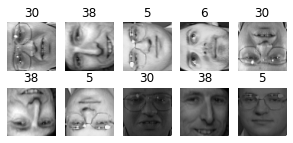

In [18]:
# rotations
n_rotated = 4
# extract images, make into 64*64, and rotate with transpose
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
# grab y labels
y_rotated = y_train[:n_rotated]

# flip
n_flipped = 3
# extract images, make into 64*64, and flip with reshape
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
# grab y labels
y_flipped = y_train[:n_flipped]

# darkened
n_darkened = 3
# copy images
darkened = X_train[:n_darkened].copy()
# darken pixels and reshape
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
# grab y labels
y_darkened = y_train[:n_darkened]

# concatentate modified images into bad set
X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

# plot it
plot_faces(X_bad_faces, y_bad)

In [23]:
# score first 10 images
print("Normal Faces:")
print(gm.score_samples(X_train_pca[:10]).mean())

# socre bad images
X_bad_faces_pca = pca.transform(X_bad_faces)
print("Bad Faces:")
print(gm.score_samples(X_bad_faces_pca).mean())

Normal Faces:
1117.5806714371781
Bad Faces:
-50293213.522051595


## 13a

Use the training data reduced with PCA to detect anomalies. Compute the reconstruction errors for the original and modified images. Then visualize a set of reconstructed images. 

As expected, the reconstruction error is much higher than for the full and normal dataset. The information loss can be seen when comparing the reconstructed image plots to the PCA'd bad face data. 

In [26]:
def reconstruction_error(pca, X):
    X_pca = pca.transform(X)
    X_recon = pca.inverse_transform(X_pca)
    mse = np.square(X_recon - X).mean(axis=-1)
    return mse

print("Normal Faces:")
print(reconstruction_error(pca, X_train).mean())

print("Bad Faces:")
print(reconstruction_error(pca, X_bad_faces).mean())

Normal Faces:
0.00019205351
Bad Faces:
0.0047073546


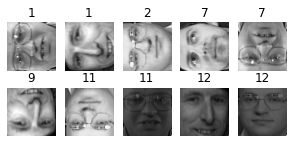

In [27]:
plot_faces(X_bad_faces, y_gen_faces)

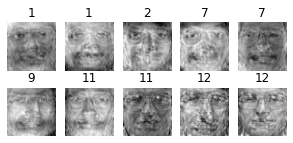

In [29]:
X_bad_faces_recon = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_recon, y_gen_faces)